In [9]:
s = '100101'

In [10]:
from qiskit import *

In [11]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

In [12]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 an

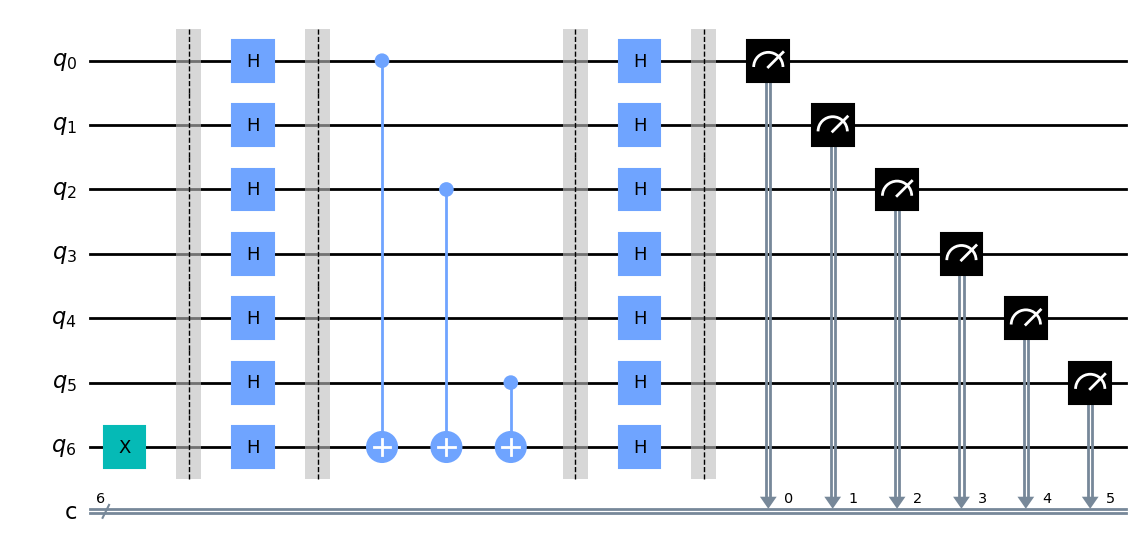

In [13]:
%matplotlib inline
circuit.draw(output='mpl')

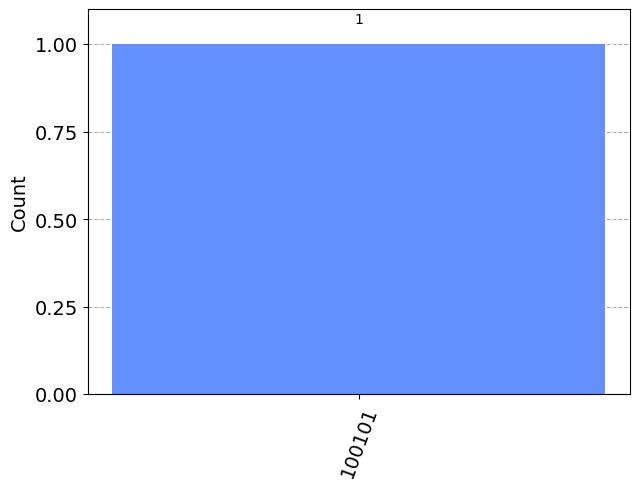

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

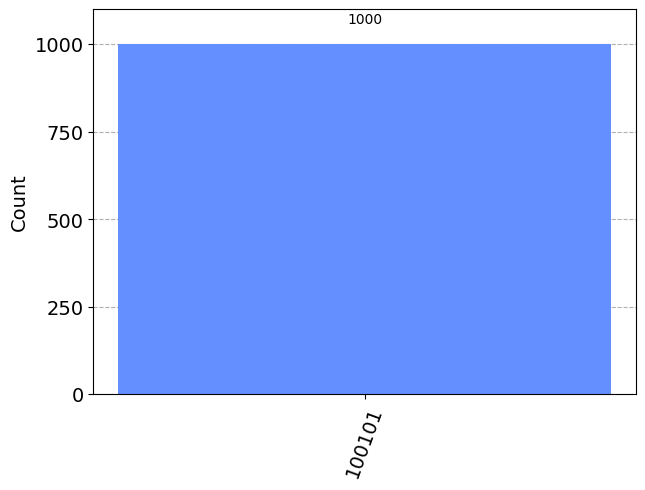

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))